In [19]:
import sklearn as sk
from sklearn import tree
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [114]:
titanic = fetch_openml("titanic", version=1, as_frame=True)
print(type(titanic))
X = titanic.data
X = X.drop(['name', 'embarked', 'cabin', 'ticket', 'body', 'home.dest', 'boat', 'parch'], axis=1)
X['sex'] = X.sex.eq('male').mul(1)
X['age'] = X['age'].fillna(0)
X['sibsp'] = X['sibsp'].fillna(0)
X['fare'] = X['fare'].fillna(0)
y = titanic.target
X.tail()

<class 'sklearn.utils.Bunch'>


,pclass,sex,age,sibsp,fare
1304,3.0,0,14.5,1.0,14.4542
1305,3.0,0,0.0,1.0,14.4542
1306,3.0,1,26.5,0.0,7.2250
1307,3.0,1,27.0,0.0,7.2250
1308,3.0,1,29.0,0.0,7.8750


In [91]:
model = tree.DecisionTreeClassifier(max_depth=4).fit(X, y)

In [96]:
dot_data = tree.export_graphviz(model, feature_names=X.columns) 
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="sex <= 0.5\ngini = 0.472\nsamples = 1309\nvalue = [809, 500]"] ;
1 [label="pclass <= 2.5\ngini = 0.397\nsamples = 466\nvalue = [127, 339]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="fare <= 26.125\ngini = 0.127\nsamples = 250\nvalue = [17, 233]"] ;
1 -> 2 ;
3 [label="age <= 56.0\ngini = 0.258\nsamples = 79\nvalue = [12, 67]"] ;
2 -> 3 ;
4 [label="gini = 0.226\nsamples = 77\nvalue = [10, 67]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
3 -> 5 ;
6 [label="fare <= 149.035\ngini = 0.057\nsamples = 171\nvalue = [5, 166]"] ;
2 -> 6 ;
7 [label="gini = 0.029\nsamples = 138\nvalue = [2, 136]"] ;
6 -> 7 ;
8 [label="gini = 0.165\nsamples = 33\nvalue = [3, 30]"] ;
6 -> 8 ;
9 [label="fare <= 23.35\ngini = 0.5\nsamples = 216\nvalue = [110, 106]"] ;
1 -> 9 ;
10 [label="age <= 16.5\ngini = 0.492\nsamples = 183\nvalue = [80, 103]"] ;
9 -> 10 ;
11 [label="gini = 0.447\nsamples = 83\nvalue = [28, 55]"] ;
10 

In [101]:
from sklearn.model_selection import cross_val_score

best_score = 0
best_combo = None

for depth in range(3, 14):
    for leafs in range(1, 3):
        for nodes in range(100, 150):
            model = tree.DecisionTreeClassifier(max_depth = depth,
                                                min_samples_leaf = leafs,
                                                max_leaf_nodes = nodes)
            cv_score = cross_val_score(model, X, y, cv=5).mean()
            if cv_score > best_score:
                best_score = cv_score
                best_combo = (depth, leafs, nodes)
                print(best_score)
                print(best_combo)

0.665356380334006
(3, 1, 100)
0.6844461992922113
(5, 1, 100)
0.6844578982773245
(7, 1, 100)
0.684463747769881
(7, 1, 101)
0.6859904653271328
(7, 1, 103)
0.6867538241057589
(7, 1, 107)
0.6875171828843848
(7, 1, 113)


In [115]:
model = tree.DecisionTreeClassifier(max_depth = 7,
                                    min_samples_leaf = 1,
                                    max_leaf_nodes = 113).fit(X, y)
dot_data = tree.export_graphviz(model, feature_names=X.columns) 
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="sex <= 0.5\ngini = 0.472\nsamples = 1309\nvalue = [809, 500]"] ;
1 [label="pclass <= 2.5\ngini = 0.397\nsamples = 466\nvalue = [127, 339]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="fare <= 26.125\ngini = 0.127\nsamples = 250\nvalue = [17, 233]"] ;
1 -> 3 ;
35 [label="age <= 56.0\ngini = 0.258\nsamples = 79\nvalue = [12, 67]"] ;
3 -> 35 ;
37 [label="age <= 1.0\ngini = 0.226\nsamples = 77\nvalue = [10, 67]"] ;
35 -> 37 ;
71 [label="fare <= 16.675\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
37 -> 71 ;
73 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
71 -> 73 ;
74 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
71 -> 74 ;
72 [label="sibsp <= 0.5\ngini = 0.211\nsamples = 75\nvalue = [9, 66]"] ;
37 -> 72 ;
79 [label="fare <= 12.825\ngini = 0.147\nsamples = 50\nvalue = [4, 46]"] ;
72 -> 79 ;
137 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11]"] ;
79 -> 137 ;
138 [label="gini = 0.184\nsamples = 39\nvalue 

In [31]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tree.DecisionTreeClassifier().fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.8666666666666667


In [42]:
from sklearn.model_selection import cross_val_score

best_score = 0
best_combo = None

for depth in range(8, 14):
    for leafs in range(1, 3):
        for nodes in range(100, 150):
            model = tree.DecisionTreeClassifier(max_depth = depth,
                                                min_samples_leaf = leafs,
                                                max_leaf_nodes = nodes)
            cv_score = cross_val_score(model, X, y, cv=5).mean()
            if cv_score > best_score:
                best_score = cv_score
                best_combo = (depth, leafs, nodes)
                print(best_score)
                print(best_combo)




0.7830114515629836
(8, 1, 100)
0.7846781182296503
(8, 1, 140)
0.7897028783658311
(9, 1, 104)
0.7913649025069638
(9, 1, 120)
0.7930331166821418
(9, 1, 128)
0.795818632002476
(10, 1, 123)


Model guessed 3
The target was 2


<Figure size 432x288 with 0 Axes>

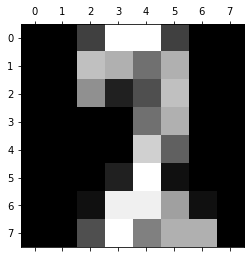

Model guessed 7
The target was 2


<Figure size 432x288 with 0 Axes>

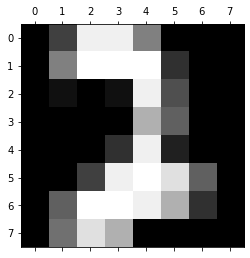

Model guessed 2
The target was 1


<Figure size 432x288 with 0 Axes>

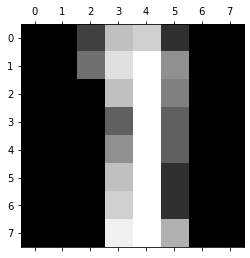

Model guessed 6
The target was 9


<Figure size 432x288 with 0 Axes>

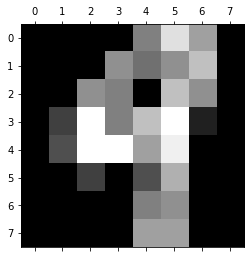

Model guessed 4
The target was 8


<Figure size 432x288 with 0 Axes>

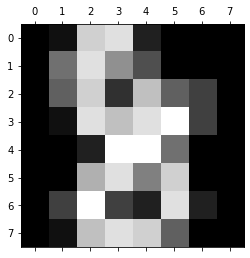

Model guessed 5
The target was 9


<Figure size 432x288 with 0 Axes>

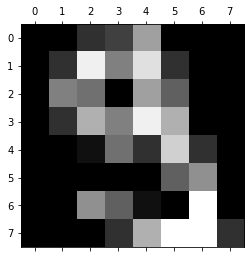

Model guessed 3
The target was 9


<Figure size 432x288 with 0 Axes>

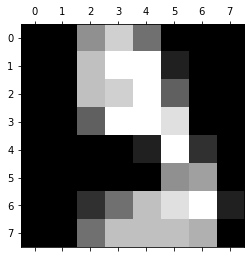

Model guessed 8
The target was 1


<Figure size 432x288 with 0 Axes>

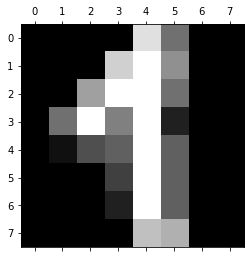

Model guessed 5
The target was 0


<Figure size 432x288 with 0 Axes>

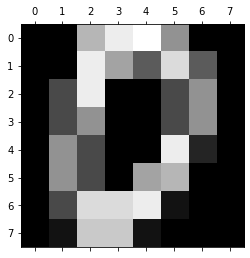

Model guessed 9
The target was 5


<Figure size 432x288 with 0 Axes>

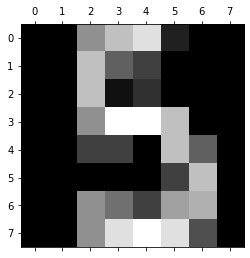

In [60]:
import matplotlib.pyplot as plt

model = tree.DecisionTreeClassifier(max_depth = 10,
                                    min_samples_leaf = 1,
                                    max_leaf_nodes = 123).fit(X_train, y_train)
num_misses = 0

guesses = model.predict(X_test)

for i, guess in enumerate(guesses):
    target = y_test[i]
    if guess != target:
        num_misses += 1
        print("Model guessed " + str(guess))
        print("The target was " + str(target))
        pic = X_test[i].reshape((8, 8))
        plt.gray()
        plt.matshow(pic)
        plt.show()
    if num_misses == 10:
        break

In [111]:
from sklearn.datasets import load_boston
import pandas as pd

In [116]:
houses = load_boston()

X = pd.DataFrame(houses.data, columns=houses.feature_names)
y = houses.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [119]:
best_score = 0
best_combo = None

for depth in range(3, 6):
    for leafs in range(1, 3):
        for nodes in range(100, 150):
            model = tree.DecisionTreeRegressor(max_depth = depth,
                                                min_samples_leaf = leafs,
                                                max_leaf_nodes = nodes)
            cv_score = cross_val_score(model, X, y, cv=5).mean()
            if cv_score > best_score:
                best_score = cv_score
                best_combo = (depth, leafs, nodes)
                print(best_score)
                print(best_combo)

0.2965483145678807
(3, 1, 100)
0.3270899192541008
(3, 1, 101)
0.33007082835920853
(3, 1, 105)
0.3300708283592086
(3, 1, 113)
0.34176794113010855
(5, 1, 147)
0.355113190484291
(5, 1, 148)


In [121]:
model = tree.DecisionTreeRegressor(max_depth = 5,
                                    min_samples_leaf = 1,
                                    max_leaf_nodes = 145).fit(X, y)
dot_data = tree.export_graphviz(model, feature_names=X.columns) 
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="RM <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533"] ;
1 [label="LSTAT <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="DIS <= 1.385\nmse = 26.009\nsamples = 255\nvalue = 23.35"] ;
1 -> 3 ;
7 [label="LSTAT <= 10.83\nmse = 78.146\nsamples = 5\nvalue = 45.58"] ;
3 -> 7 ;
17 [label="mse = 0.0\nsamples = 4\nvalue = 50.0"] ;
7 -> 17 ;
18 [label="mse = -0.0\nsamples = 1\nvalue = 27.9"] ;
7 -> 18 ;
8 [label="RM <= 6.543\nmse = 14.885\nsamples = 250\nvalue = 22.905"] ;
3 -> 8 ;
9 [label="LSTAT <= 7.57\nmse = 8.39\nsamples = 195\nvalue = 21.63"] ;
8 -> 9 ;
23 [label="mse = 3.015\nsamples = 43\nvalue = 23.97"] ;
9 -> 23 ;
24 [label="mse = 7.924\nsamples = 152\nvalue = 20.968"] ;
9 -> 24 ;
10 [label="TAX <= 269.0\nmse = 11.694\nsamples = 55\nvalue = 27.427"] ;
8 -> 10 ;
29 [label="mse = 5.38\nsamples = 17\nvalue = 30.241"] ;
10 -> 29 ;
30 [label="mse = 9.392\nsamples = 